<a href="https://colab.research.google.com/github/igor-xmchaves/AI_UFC/blob/main/Igor_Chaves_Projeto_Computacional_2_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTELIGÊNCIA ARTIFICIAL (UFC) - PROJETO COMPUTACIONAL 2 - CNN**

- Aluno: Igor Chaves (495179)
- Curso: Ciência de Dados

**Link para apresentação:** https://drive.google.com/file/d/1UOzxqVw5hF8aNCR4CYPRbPp5ZgzlicED/view?usp=sharing

## **Introdução**
Neste trabalho, teremos como objetivo demonstrar o processo de construção, treinamento e avaliação de uma **Rede Neural Convolucional (CNN)** para classificação de imagens usando o dataset **CIFAR-10** (Canadian Institute For Advanced Research).

 ### **Importando bibliotecas necessárias**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

### **Carregamento e pré-processamento do conjunto de dados**

In [ ]:
# Importando o dataset CIFAR-10
from tensorflow.keras.datasets import cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

Sobre conjunto de dados **CIFAR-10**:
 * Possui **60000 imagens** coloridas de 32x32 em **10 classes** (6000 imagens por classe).
 * Sendo as **classes** classificadas como: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, e trucks.
 * Organizado em **50000 imagens de treinamento** e **10000 imagens de teste**:
  - 5 lotes de treinamento e 1 de teste (10000 imagens em cada).

 * Lote de teste:
  - Contêm **1000 imagens aleatórias** de cada classe.
 * Lotes de treinamento:
  - Contêm as imagens restantes em ordem aleatória;  
  - Alguns lotes podem conter mais imagens de uma classe do que de outra;  
  - Contêm 5000 imagens de cada classe.

 * As classes são **mutuamente exclusivas**.
 * Não há sobreposição entre automóveis e caminhões. "Automóvel" inclui sedãs, SUVs, coisas desse tipo. "Caminhão" inclui apenas caminhões grandes. Nenhum dos dois inclui caminhonetes.

In [ ]:
# Exibe o formato (shape) do array X_train, que contém as features do conjunto de treino
print('X_train Shape: {}'.format(X_train.shape))

# Exibe o formato (shape) do array X_test, que contém as features do conjunto de teste
print('X_test Shape: {}'.format(X_test.shape))

# Exibe o formato (shape) do array Y_train, que contém os rótulos do conjunto de treino
print('Y_train Shape: {}'.format(Y_train.shape))

# Exibe o formato (shape) do array Y_test, que contém os rótulos do conjunto de teste
print('Y_test Shape: {}'.format(Y_test.shape))

X_train Shape: (50000, 32, 32, 3)
X_test Shape: (10000, 32, 32, 3)
Y_train Shape: (50000, 1)
Y_test Shape: (10000, 1)


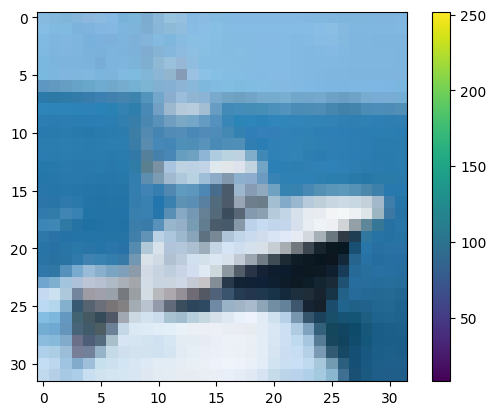

In [ ]:
# Exemplo de imagem do dataset
plt.figure()
plt.imshow(X_train[8])
plt.colorbar()

In [ ]:
# Normalizando os dados de treino e teste
# Divide todos os valores dos pixels por 255 para escaloná-los no intervalo [0, 1]
X_train = X_train / 255
X_test = X_test / 255

# Aplicando one-hot encoding aos rótulos de treino e teste
# Converte os rótulos (Y_train e Y_test) em vetores one-hot com 10 classes
Y_train_en = to_categorical(Y_train, 10)
Y_test_en = to_categorical(Y_test, 10)

In [ ]:
# Função para visualização de exemplos do dataset

# Importa a função shuffle para embaralhar os dados
from sklearn.utils import shuffle

# Define a função para exibir imagens em uma grade
def showImages(num_row, num_col, X, Y):

    # Embaralha as imagens e rótulos para exibir amostras aleatórias
    (X_rand, Y_rand) = shuffle(X, Y)

    # Cria uma figura com uma grade de subplots (imagens)
    fig, axes = plt.subplots(num_row, num_col, figsize=(12, 12))
    axes = axes.ravel()  # Transforma a matriz de eixos em um array 1D para facilitar a iteração

    # Itera sobre o número de imagens a serem exibidas
    for i in range(0, num_row * num_col):
        axes[i].imshow(X_rand[i])  # Exibe a imagem no subplot correspondente
        axes[i].set_title("{}".format(labels[Y_rand.item(i)]))  # Define o título como o rótulo da imagem
        axes[i].axis('off')  # Remove os eixos do subplot
        plt.subplots_adjust(wspace=1)  # Ajusta o espaçamento horizontal entre os subplots

    return  # A função não retorna nenhum valor

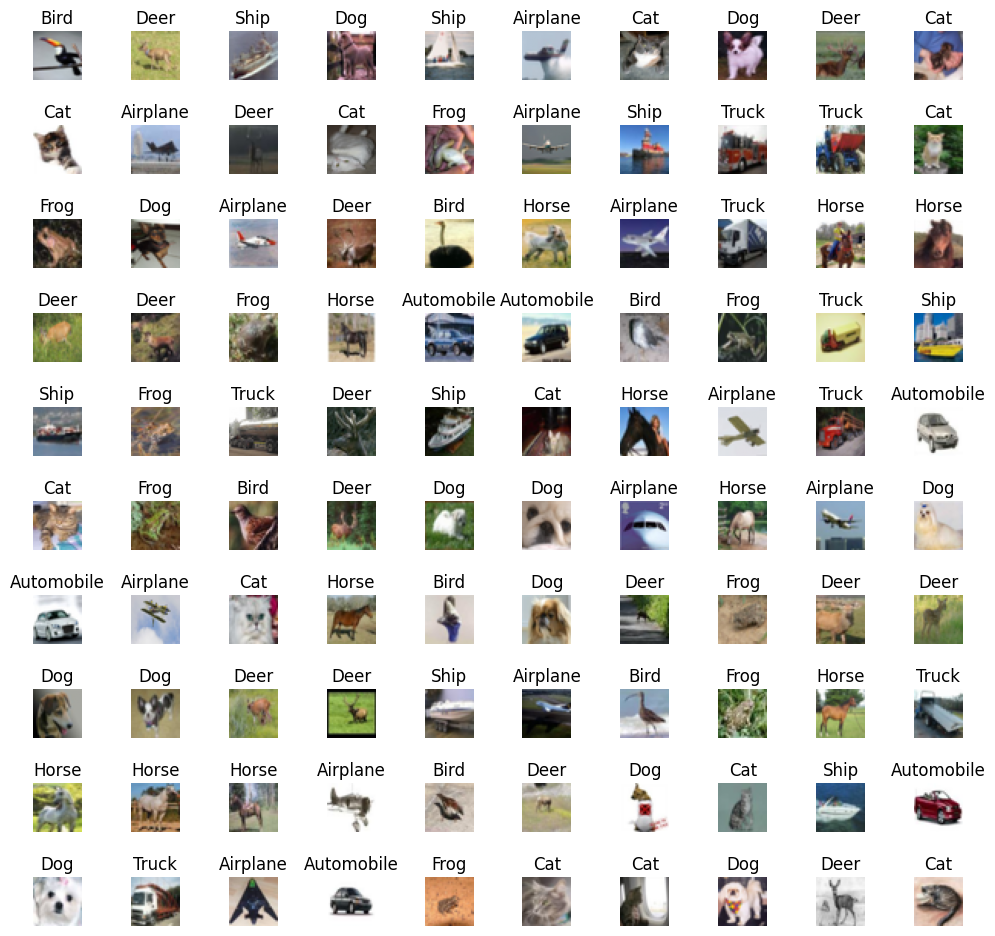

In [ ]:
# Lista de rótulos correspondentes aos valores numéricos em Y_train
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Define o número de linhas e colunas para a grade de imagens
num_row = 10
num_col = 10

# Chama a função showImages para exibir uma grade de 10x10 imagens
# X_train: Conjunto de imagens de treino
# Y_train: Rótulos correspondentes às imagens de treino
showImages(num_row, num_col, X=X_train, Y=Y_train)

### **Definição da arquitetura da CNN**

In [ ]:
# Inicialização do modelo sequencial
model = Sequential()

# Primeira camada convolucional com 64 filtros de tamanho 4x4
model.add(Conv2D(64, (4,4), input_shape=(32,32,3), activation='relu', padding='same'))
model.add(BatchNormalization()) # Normalização em lote para estabilizar o treinamento

# Segunda camada convolucional com 64 filtros de tamanho 4x4
model.add(Conv2D(64, (4,4), activation='relu', padding='same'))
model.add(BatchNormalization()) # Normalização em lote
model.add(MaxPooling2D(pool_size=(2,2)))  # Camada de Max Pooling para reduzir a dimensionalidade
model.add(Dropout(0.2)) # Dropout para regularização (20% dos neurônios são desligados aleatoriamente)

# Terceira camada convolucional com 128 filtros de tamanho 4x4
model.add(Conv2D(128, (4,4), activation='relu', padding='same'))
model.add(BatchNormalization())

# Quarta camada convolucional com 128 filtros de tamanho 4x4
model.add(Conv2D(128, (4,4), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Quinta camada convolucional com 128 filtros de tamanho 4x4
model.add(Conv2D(128, (4,4), activation='relu', padding='same'))
model.add(BatchNormalization())

# Sexta camada convolucional com 128 filtros de tamanho 4x4
model.add(Conv2D(128, (4,4), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.35))

# Camada Flatten para transformar a saída 2D em 1D
model.add(Flatten())
# Camada densa com 512 neurônios e ativação ReLU
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Camada densa com 128 neurônios e ativação ReLU
model.add(Dense(128, activation='relu'))  # Camada densa com 128 neurônios e ativação ReLU
model.add(BatchNormalization())
model.add(Dropout(0.5))
# Camada de saída com 10 neurônios (um para cada classe) e ativação softmax
model.add(Dense(10, activation='softmax'))

# Compilação do modelo
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### **Treinamento**

In [ ]:
# Exibe um resumo da arquitetura do modelo, incluindo o tipo de cada camada,
# o formato de saída e o número de parâmetros.
model.summary()

# Treina o modelo usando o conjunto de dados de treinamento (X_train, Y_train_en).
# - epochs=20: O modelo será treinado por 20 épocas.
# - verbose=1: Exibe uma barra de progresso e métricas durante o treinamento.
# - batch_size=64: O conjunto de treinamento é dividido em lotes de 64 amostras.
# - validation_data=(X_test, Y_test_en): O modelo é avaliado no conjunto de validação após cada época.
history = model.fit(
    X_train,                # Dados de treinamento (imagens)
    Y_train_en,             # Labels de treinamento (codificados em one-hot)
    epochs=20,              # Número de épocas de treinamento
    verbose=1,              # Exibe o progresso do treinamento
    batch_size=64,          # Tamanho do lote para atualização dos pesos
    validation_data=(X_test, Y_test_en)  # Dados de validação
)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 32, 32, 64)          │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 32, 32, 64)          │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 16, 16, 128)         │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 8, 8, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_36               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 8, 8, 128)           │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_37               │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 2,107,914 (8.04 MB)

 Trainable params: 2,105,354 (8.03 MB)

 Non-trainable params: 2,560 (10.00 KB)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 38ms/step - accuracy: 0.3193 - loss: 2.1547 - val_accuracy: 0.5804 - val_loss: 1.1807
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.6435 - loss: 1.0104 - val_accuracy: 0.5218 - val_loss: 1.6257
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.7363 - loss: 0.7765 - val_accuracy: 0.4979 - val_loss: 1.7028
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.7819 - loss: 0.6516 - val_accuracy: 0.7110 - val_loss: 0.9452
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 30ms/step - accuracy: 0.8209 - loss: 0.5457 - val_accuracy: 0.7178 - val_loss: 0.8605
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8440 - loss: 0.4755 - val_accuracy: 0.7943 - val_loss: 0.6365
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.8605 - loss: 0.4212 - val_accuracy: 0.7681 - val_loss: 0.7289
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.8750 - loss: 0.3816 - 

### **Teste**

In [ ]:
# Avalia o modelo nos dados de teste e armazena os resultados
evaluation = model.evaluate(X_test, Y_test_en)

# Exibe a acurácia do modelo no conjunto de teste
print('Model Accuracy (Test): {}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8488 - loss: 0.5688
Model Accuracy (Test): 0.8463000059127808


### **Avaliação do modelo**

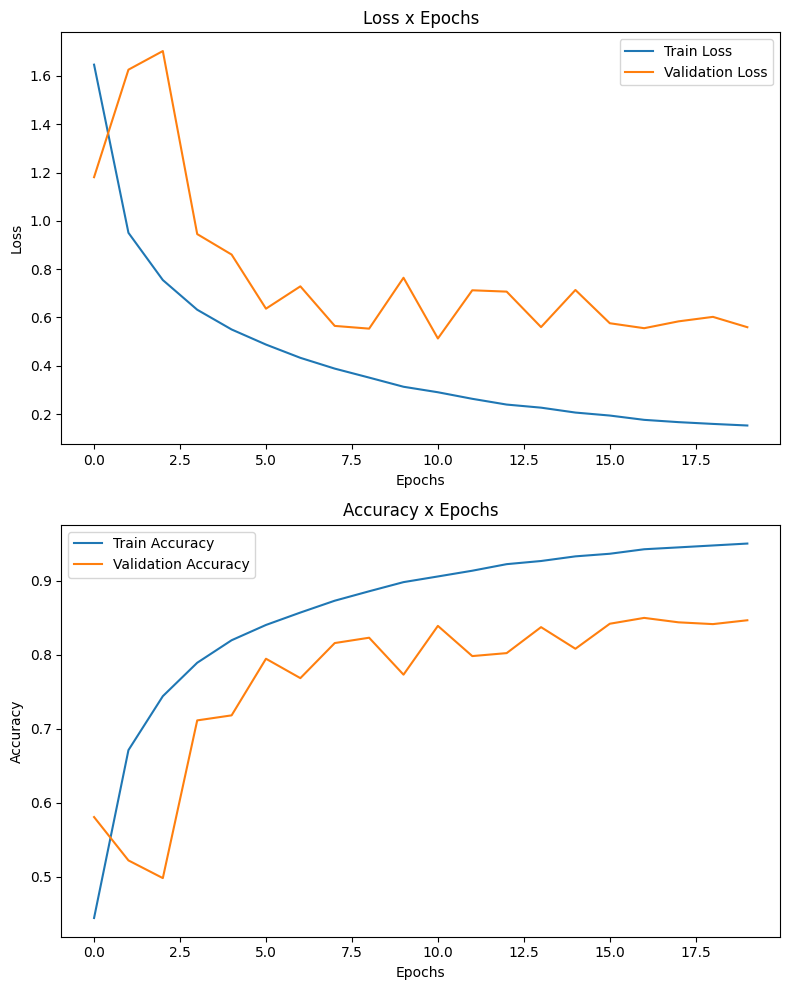

In [ ]:
def plotloss(history):
    """
    Função para plotar a perda (loss) e a acurácia (accuracy) do modelo ao longo das épocas.

    history: Objeto retornado pelo model.fit(), que contém o histórico do treinamento.
    """

    # Criação de um gráfico de duas subplots: uma para loss e outra para accuracy
    fig, axs = plt.subplots(2, 1, figsize=(8, 10))  # 2 linhas, 1 coluna

    # Plotando a perda (loss)
    axs[0].plot(history.history['loss'], label='Train Loss')
    axs[0].plot(history.history.get('val_loss', []), label='Validation Loss')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].set_title('Loss x Epochs')
    axs[0].legend()

    # Verifica se há acurácia registrada no histórico antes de tentar plotar
    if 'accuracy' in history.history:
        axs[1].plot(history.history['accuracy'], label='Train Accuracy')
        axs[1].plot(history.history.get('val_accuracy', []), label='Validation Accuracy')
        axs[1].set_xlabel('Epochs')
        axs[1].set_ylabel('Accuracy')
        axs[1].set_title('Accuracy x Epochs')
        axs[1].legend()

    # Ajusta os espaçamentos entre os gráficos
    plt.tight_layout()
    plt.show()

# Chamando a função com o histórico de treinamento
plotloss(history)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8488 - loss: 0.5688
Test Accuracy : 84.63%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


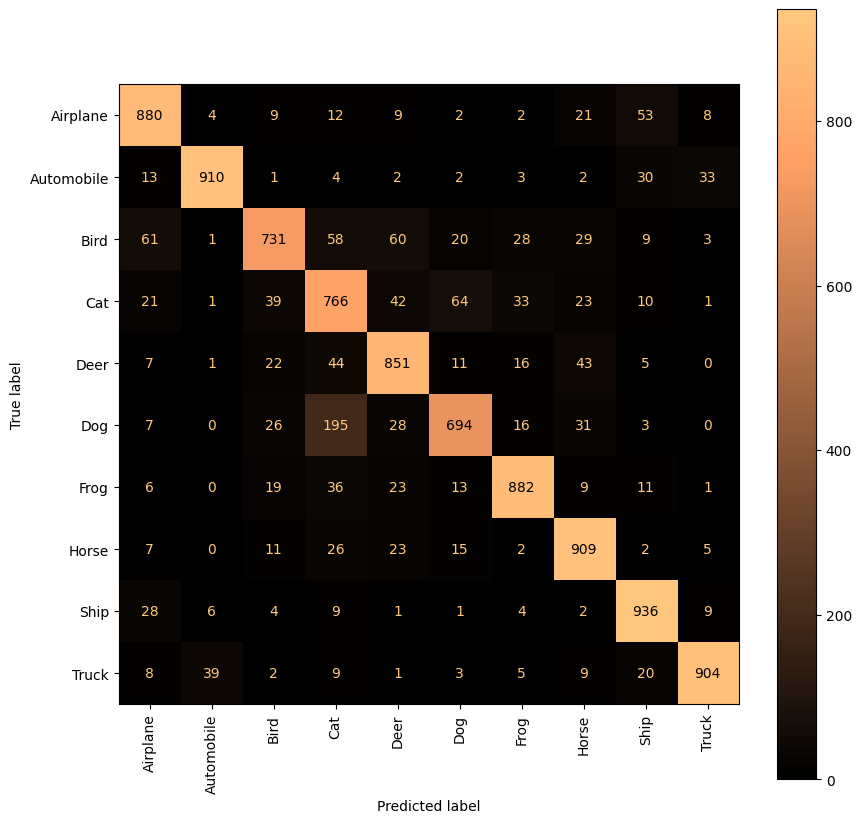

In [ ]:
# Avalia o modelo no conjunto de teste
model.evaluate(X_test, Y_test_en)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

# Gera previsões no conjunto de teste
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
Y_test_en = np.argmax(Y_test_en, axis=1)

# Criação da matriz de confusão
cm = confusion_matrix(Y_test_en, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

# Personalização do gráfico
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='copper')

plt.show()

In [ ]:
print(classification_report(Y_test_en, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1000
           1       0.95      0.91      0.93      1000
           2       0.85      0.73      0.78      1000
           3       0.66      0.77      0.71      1000
           4       0.82      0.85      0.83      1000
           5       0.84      0.69      0.76      1000
           6       0.89      0.88      0.89      1000
           7       0.84      0.91      0.87      1000
           8       0.87      0.94      0.90      1000
           9       0.94      0.90      0.92      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



## **Considerações finais**

  * A arquitetura escolhida para rede foi [2 conv (64), 4 conv (128), 3 den (512, 128, 10)], utilizando **BatchNormalization** e **Dropout** para estabilizar o treinamento. Além disso, o treinamento foi feito para 20 épocas, com um batch_size de 64.

  * Para validar a escolha da arquitetura foram feitos alguns testes mudando somente as quantidades de camadas convolucionais (conv) e densas (den):

      1. Arquitetura: [2 conv (64), 1 conv (128), 2 den (256, 10)]:
      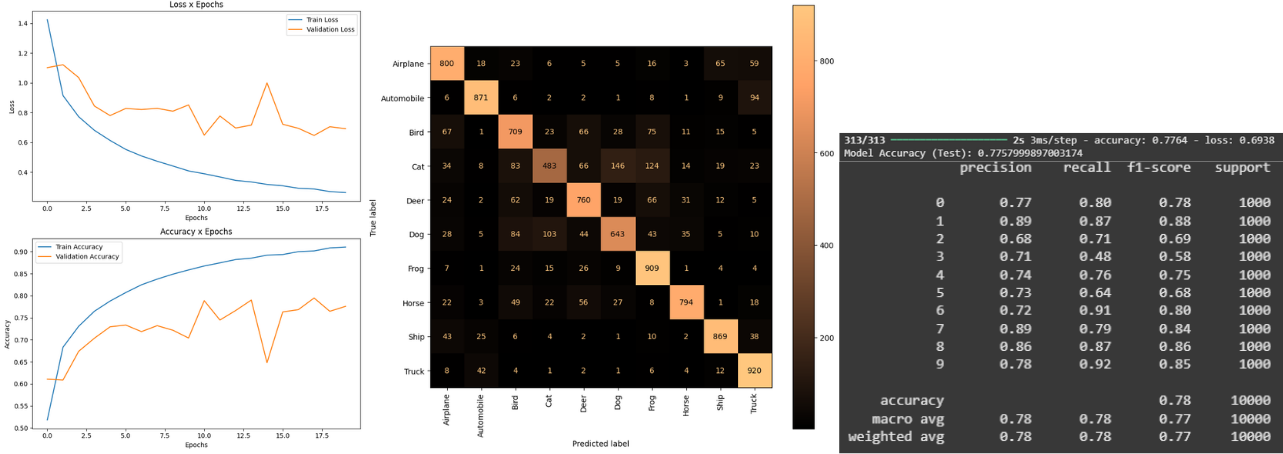
      
      2. Arquitetura: [2 conv (64), 2 conv (128), 2 den (512, 10)]:
      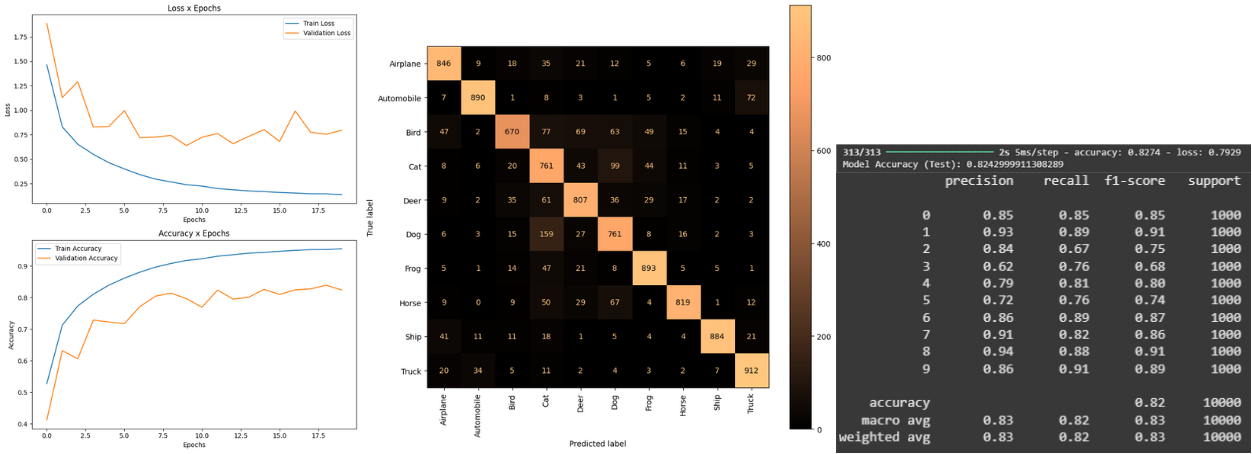
